# MTH 255 Final Project Code [MBTI Application]


In [136]:
# Program that generated random graph based on speculated probability for any two different type of people to  
# become friends.
# author: Zoey Sun
# last updated: 04/29/2018

In [6]:
%matplotlib inline
from pylab import *
import random as rnd
import networkx as nx
from __future__ import division


def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=400, node_color='blue', node_alpha=0.3,
               node_text_size=8,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    # show graph
    plt.show()

### Method to find the set of connected components from a starting node on a graph.

In [8]:
def find_connected_component(graph, starting_node):
    connected_nodes = set()
    connected_nodes.add( starting_node )
    changed_flag = True
    while changed_flag:
        changed_flag = False
        for node1,node2 in graph:
            if (node1 in connected_nodes and node2 not in connected_nodes) or \
                (node1 not in connected_nodes and node2 in connected_nodes):
                connected_nodes.add(node1)
                connected_nodes.add(node2)
                changed_flag = True
    return connected_nodes

### Returns all the connected components of the graph.

In [12]:
def connected_components(graph):
    nodes = set()
    components = []
    for edge in graph:
        for node in edge:
            nodes.add(node)
    flag = False
    for node in nodes:
        for component in components:
            if node in component:
                flag = True
                break
        if not flag:
            components.append(find_connected_component(graph,node))
        flag = False
    return components

component_sizes = lambda graph: [len(component) for component in (connected_components(graph))]
largest_component_size = lambda graph: max(component_sizes(graph))

In [13]:
# These guys should work after you've implemented connected_components
component_sizes = lambda graph: [len(component) for component in (connected_components(graph))]
largest_component_size = lambda graph: max(component_sizes(graph))

In [14]:
print(connected_components(graph))
print(largest_component_size(graph))

[{8, 1, 7}, {2, 3, 4, 5, 6}]
5


### Ideal Case that Every Node Probability is the same

In [25]:
def G(n,p):
    graph = []
    for i in range(n):
        graph.append((i,i))
    for i in range(n): 
        for j in range(i+1,n):
            if rnd.random() < p:
                graph.append( (i, j) )
    return graph

Make sure you can see all nodes from 1 to 10 in the graph below -- if not, check your code!

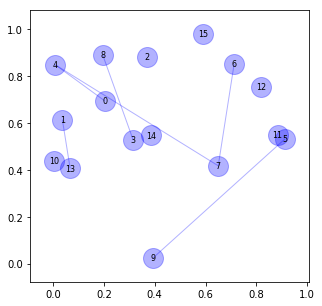

The sets of connected components for 16 nodes random graph with a prob. of 0.0425 is:
[{0, 4, 6, 7}, {1, 13}, {2}, {8, 3}, {9, 5}, {10}, {11}, {12}, {14}, {15}]
The largest connected component has a size of:
4


In [83]:
graph = G(16,0.0472)
draw_graph(graph,graph_layout='random')
rcParams['figure.figsize'] = 5, 5  
print("The sets of connected components for 16 nodes random graph with a prob. of 0.0425 is:")
print(connected_components(graph))
print("The largest connected component has a size of:")
print(largest_component_size(graph))

In [114]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy

## Load Character Data (16 different chars)
df = pd.read_excel('mbti.xlsx', sheet_name='Sheet1')
charGroup = df.columns[1:].values
prob_matrix = df.as_matrix(columns=df.columns[1:])
print(charGroup)
#print(prob_matrix)
mean_base = mean(prob_matrix)

['ISTJ' 'ISFJ' 'ISTP' 'ISFP' 'ESTP' 'ESTJ' 'ESFP' 'ESFJ' 'INFJ' 'INFP'
 'ENFP' 'ENFJ' 'INTJ' 'INTP' 'ENTP' 'ENTJ']


In [51]:
# n is the number of node in the graph and frac denote the fraction of base probability 
# according to the chart [0.02,0.32] 16 different steps
def Char_G(n,frac):
    graph = []
    for i in range(n):
        graph.append((charGroup[i],charGroup[i]))
    for i in range(n): 
        for j in range(i+1,n):
            if rnd.random() < prob_matrix[i][j]/frac:
                graph.append( (charGroup[i], charGroup[j]) )
    return graph

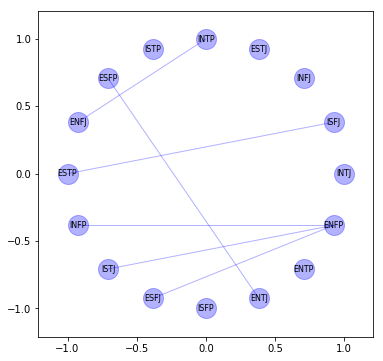

Considering 16 different characters:
The sets of connected components for 16 nodes random graph is:
[{'INTJ'}, {'INFP', 'ISTJ', 'ENFP', 'ESFJ'}, {'INFJ'}, {'ENTJ', 'ESFP'}, {'ENFJ', 'INTP'}, {'ISTP'}, {'ESTP', 'ISFJ'}, {'ESTJ'}, {'ISFP'}, {'ENTP'}]
The largest connected component has a size of:
4


In [89]:
graph2 = Char_G(16,3.6)
#print("The mean probability for each node is:")
#print(mean_base/3.6)
draw_graph(graph2,labels=charGroup)
rcParams['figure.figsize'] = 5.5, 5.5
print("Considering 16 different characters:")
print("The sets of connected components for 16 nodes random graph is:")
print(connected_components(graph2))
print("The largest connected component has a size of:")
print(largest_component_size(graph2))

In [71]:
# Try bigger graph
## Load Character Data (160 nodes)
df2 = pd.read_excel('mbti_160.xlsx', sheet_name='Sheet1')
charGroup2 = df.columns[1:].values
prob_matrix2 = df.as_matrix(columns=df.columns[1:])

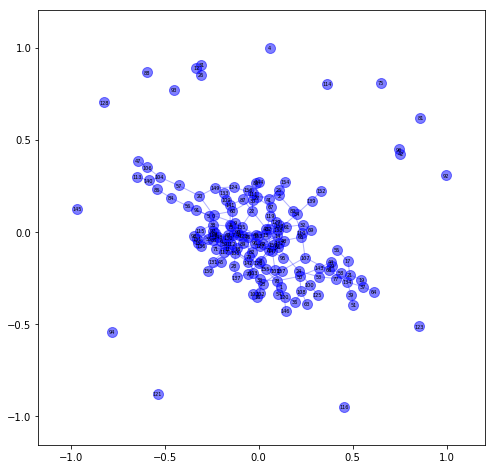

The sets of connected components for 160 nodes random graph with a prob. of 0.017 is:
[{0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 89, 90, 91, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117, 118, 119, 120, 122, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159}, {4}, {26, 12, 31}, {96, 42}, {75}, {81}, {88}, {92}, {93}, {94}, {114}, {116}, {121}, {123}, {128}, {145}]
The largest connected component has a size of:
142


In [97]:
graph = G(160,0.017)
draw_graph(graph,graph_layout='spring',
               node_size=100, 
               node_text_size=5
               )
rcParams['figure.figsize'] = 8, 8
print("The sets of connected components for 160 nodes random graph with a prob. of 0.017 is:")
print(connected_components(graph))
print("The largest connected component has a size of:")
print(largest_component_size(graph))

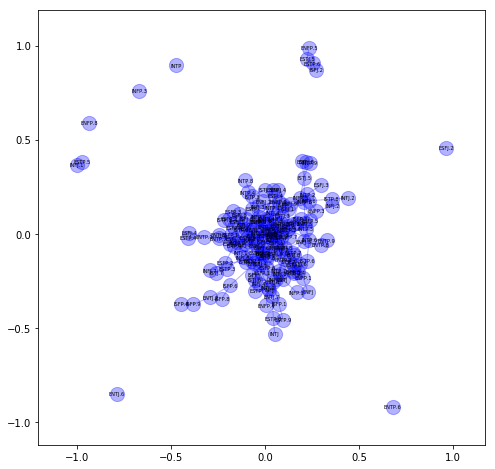

A social cycle of 160 people (assume each type of char is uniformly distributed):
The sets of connected components for 16 nodes random graph is:
[{'ENTJ.4', 'ESFP', 'ISFP.1', 'ESTP.2', 'INFP.5', 'ENFP.3', 'ISTP.8', 'INFJ.6', 'INTP.1', 'ESFJ.7', 'ENFJ.2', 'ISTP.6', 'ESFJ', 'INFP.9', 'ISFJ.6', 'INFJ.5', 'ENTP', 'ENFJ.9', 'ESTJ.8', 'INFP.1', 'ISTP.3', 'INFP.4', 'ESTP.8', 'ISTJ.5', 'ESFJ.6', 'ENTP.5', 'INFP.2', 'ENFJ.6', 'ENFJ.8', 'ISTJ', 'ESFJ.5', 'ENTP.1', 'ENTJ.2', 'INFJ.2', 'ISFJ.8', 'ESTP.4', 'INFJ.4', 'ISTJ.6', 'ESTP', 'ENFP.9', 'ISFJ.1', 'ESFP.8', 'ENTP.7', 'ISFP.3', 'ISTP.4', 'ISTJ.9', 'ESFP.6', 'INTJ', 'INTJ.8', 'ESTJ', 'ESTJ.7', 'ESFP.4', 'ESTJ.4', 'ESFP.5', 'ESFP.9', 'INTP.3', 'ESTP.3', 'ISFP.4', 'ENTP.3', 'INFJ.7', 'ENTJ.9', 'ISTP.7', 'ISTP', 'ESTJ.6', 'INTP.6', 'ESFP.7', 'INFJ.8', 'ESFJ.3', 'INTJ.3', 'INTJ.4', 'ESFP.1', 'INFJ.9', 'ENFP.7', 'INTJ.5', 'ISTJ.7', 'ESTJ.9', 'ENFJ.1', 'INTJ.2', 'ENFP.6', 'INTJ.7', 'ENTJ.3', 'INTP.8', 'ENTJ.5', 'ENTP.9', 'INFP', 'ENFP.2', 'INTP.2', '

In [99]:
graph4 = Char_G(160,10)
#print("The mean probability for each node is:")
#print(mean_base/10)
draw_graph(graph4,graph_layout='spring',
               node_size=200, 
               node_text_size=5)
print("A social cycle of 160 people (assume each type of char is uniformly distributed):")
print("The sets of connected components for 16 nodes random graph is:")
print(connected_components(graph4))
print("The largest connected component has a size of:")
print(largest_component_size(graph4))

In [125]:
G = nx.Graph()
G.add_edges_from(graph4)
degree_seq = sorted(G.degree, key=lambda x: x[1], reverse=True)
# combine all the degree given type
combined_seq = {}
for i in charGroup:
    combined_seq[i] = 0
#print(combined_seq)

for item in degree_seq:
    chartype = item[0].split('.')[0]
    if chartype in combined_seq:
        combined_seq[chartype] += item[1] 
    
sorted(combined_seq)

['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']


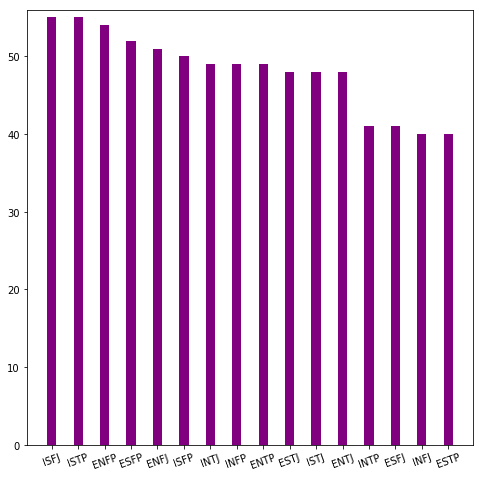

In [132]:
def dict_vis(Dictionary):
    Dictionary_Length = len(Dictionary)
    Max_Key_Length = 15
    Sorted_Dict_Values = sorted(Dictionary.values(), reverse=True)
    Sorted_Dict_Keys = sorted(Dictionary, key=Dictionary.get, reverse=True)
    for i in range(0,Dictionary_Length):
        Key = Sorted_Dict_Keys[i]
        Key = Key[:Max_Key_Length]
        Sorted_Dict_Keys[i] = Key
    X = np.arange(Dictionary_Length)

    Figure = plt.figure()
    Axis = Figure.add_subplot(1,1,1)
    for i in range(0,Dictionary_Length):
        Axis.bar(X[i], Sorted_Dict_Values[i], align='center',width=0.35, color='purple')

    Axis.set_xticks(X)
    xtickNames = Axis.set_xticklabels(Sorted_Dict_Keys)
    plt.setp(Sorted_Dict_Keys)
    plt.xticks(rotation=20)
    ymax = max(Sorted_Dict_Values) + 1
    plt.ylim(0,ymax)

    plt.show()

dict_vis(combined_seq)